Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

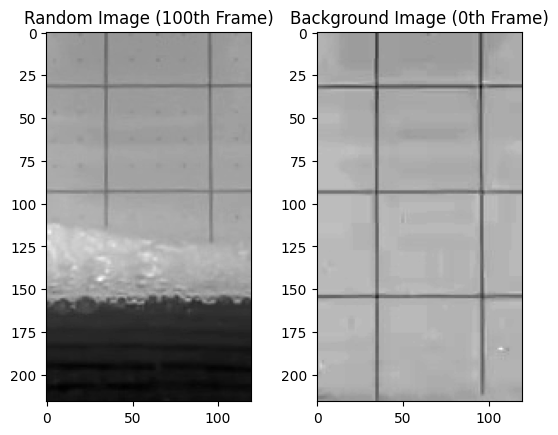

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


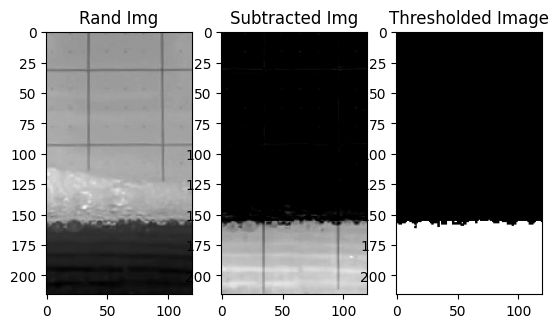

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

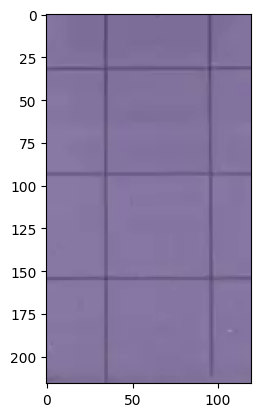

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **ANSWERS**

## **01.Liquid level graph**
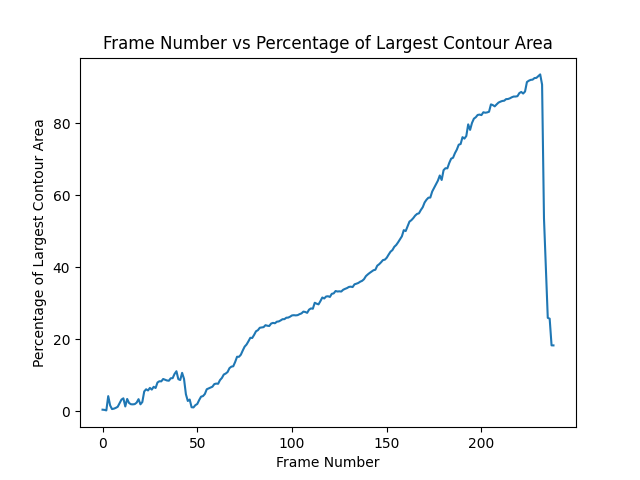

## **02. Otsu's Thresholding Method**

Otsu's thresholding is an image segmentation technique used to automatically determine the optimal threshold value for separating an image into foreground and background regions. It is particularly useful for images with a bimodal histogram, where pixel intensities can be clearly divided into two classes.

By analyzing the histogram of pixel intensities, Otsu's method calculates a threshold value that minimizes intra-class variance (the variance within each class) while maximizing inter-class variance (the separation between classes). This is done automatically without the need to specify the threshold manually.

In OpenCV, Otsu's method can be implemented using cv2.threshold() by passing the flag cv2.THRESH_OTSU. It is often combined with Gaussian filtering to reduce noise, which improves the effectiveness of the thresholding process.

Example Workflow:
Preprocess the image (e.g., grayscale conversion, Gaussian blur).
Apply Otsu's thresholding using cv2.threshold() with the THRESH_OTSU flag.
Obtain a binary image as output, where pixels are segmented into foreground and background based on the optimal threshold.

## **03. Examples images for probable erroraneous liquid level readings**

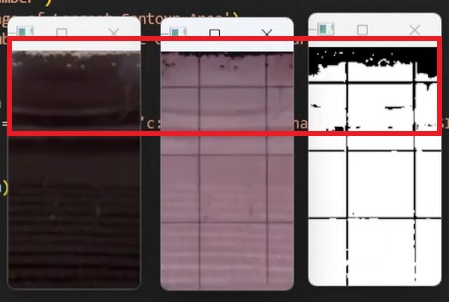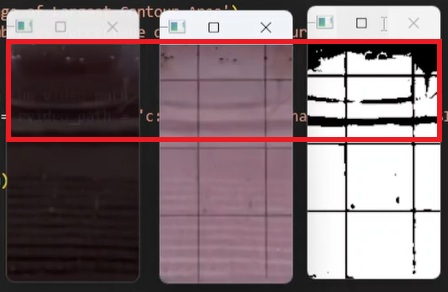

## **04. Algorithm explanation**

The algorithm processes a video frame by frame to detect changes in the scene and calculates the percentage area of the largest detected change. Here's a brief description:

1. **Video Initialization**:
   - Open the video file and read the first frame to use as the background reference.

2. **Frame-by-Frame Processing**:
   - For each subsequent frame, calculate the difference between the current frame and the background using `cv2.absdiff`.
   - Convert the difference image to grayscale and apply Otsu's thresholding to create a binary image, highlighting significant changes.

3. **Contour Detection**:
   - Find contours in the binary image to identify distinct regions of change.
   - Calculate the area of the largest contour, if any, and express it as a percentage of the total frame area.

4. **Visualization**:
   - Display the original frame, the difference image, and the thresholded binary image in real-time.
   - Append the percentage of the largest contour area to a list for analysis.

5. **Result Plotting**:
   - After processing all frames, plot the percentage values against frame numbers to visualize changes over time.

6. **User Control**:
   - Allow the user to terminate the video processing by pressing the 'q' key.

This algorithm is effective for detecting and quantifying scene changes, making it useful for applications like object tracking or activity monitoring in videos.

In [ ]:
import cv2
import matplotlib.pyplot as plt

def calculate_largest_contour_area_percentage(frame, background):
    # Subtract the current frame from the background
    img_sub = cv2.absdiff(background, frame)

    # Convert to grayscale
    img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    _, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the largest contour area percentage
    if contours:
        largest_contour_area = max(cv2.contourArea(c) for c in contours)
        frame_area = frame.shape[0] * frame.shape[1]
        return (largest_contour_area / frame_area) * 100
    return 0

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Read the first frame as the background
    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    percentages = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Calculate the percentage for the current frame
        percentage = calculate_largest_contour_area_percentage(frame, background)
        percentages.append(percentage)

        # Display the video and processed frames
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', cv2.absdiff(background, frame))
        cv2.imshow('Thresholded Frame', cv2.threshold(cv2.cvtColor(cv2.absdiff(background, frame), cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot frame number vs percentage
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()

# Call the function with the video path
video_path = video_path = rvideo_path = 'c:/Users/Piyumantha/Desktop/UNIVERSITY/YEAR 04/SEM 02/Machine Vision Systems/Assignment/Assignment 02/ETM4272-main/demo2_images/liquidVideo.mp4'


process_video(video_path)
